SEQ: [Name: Eingang Zuverlässigkeit: 0.9861, PAR: [Name: Rechner1 Zuverlässigkeit: 0.9783, Name: Rechner2 Zuverlässigkeit: 0.9783], Name: Ausgang Zuverlässigkeit: 0.9639]


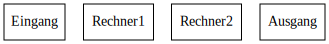

In [41]:
import math
import graphviz

class BLOCK:
    def __init__(self, name, reliability):
        self.name = name
        self.reliability = reliability
        self.availibilty = 1.0 - self.reliability

    def __repr__(self):
        return "Name: " + str(self.name) + " Zuverlässigkeit: " +str(self.reliability)

    def printname(self):
        print(self.name)
        return

    def getname(self):
        return self.name
    
    def rel(self):
        return self.reliability
    
    def avil(self):
        return self.availibilty
    
    def print(self, graph):
        graph.node(self.name, self.name, shape='rectangle')
        return graph
    
class SEQBLOCK:
    def __init__(self, name):
        self.blocks = []
        self.name = name

    def __repr__(self):
        return "SEQ: " + str(self.blocks)

    def append(self, node):
        self.blocks.append(node)
        return
    
    def printname(self):
        print(self.name)
        return
    
    def getname(self):
        return self.name
    
    
    def rel(self):
        reliability = 1.0

        for block in self.blocks:
            reliability = reliability * block.rel()

        return reliability
    
    def print(self, graph):
        for block in self.blocks:
            block.print(graph)
        return graph
    
class PARBLOCK:
    def __init__(self, name):
        self.blocks = []
        self.name = name

    def __repr__(self):
        return "PAR: " + str(self.blocks)

    def append(self, node):
        self.blocks.append(node)
        return 
    
    def printname(self):
        print(self.name)
        return
    
    def getname(self):
        return self.name
    
    def rel(self):
        reliability = 0
        i = 1
        for block in self.blocks:
            reliability = reliability +  math.comb(len(self.blocks),i) * (block.rel() ** i) * ((block.avil()) ** (2-i))
            i += 1
        return reliability
    
    def print(self, graph):
        for block in self.blocks:
            block.print(graph)
        return graph
    
E = BLOCK("Eingang", 0.9861)
R1 = BLOCK("Rechner1", 0.9783)
R2 = BLOCK("Rechner2", 0.9783)
A = BLOCK("Ausgang", 0.9639)

seq = SEQBLOCK("Alle")
par = PARBLOCK("Alle Rechner")

par.append(R1)
par.append(R2)

seq.append(E)
seq.append(par)
seq.append(A)

print(seq)

seq.rel()

g = graphviz.Digraph()
seq.print(g)

In [5]:
test = [1,2]
#print(len(test))
for i in range(1,len(test)+1):
    print(i)

1
2


In [11]:
import math
math.comb(20,2)

190

In [30]:
i = 1
(0.9783) ** (2-i)

0.9783